# UE22CS342AA2: Data Analytics - Worksheet 3a
# Time Series Analysis and Forecasting Techniques

Designed by Anshul Ranjan, Dept.of CSE - itsanshulranjan@gmail.com

## Student Details

• Name:Sanjana Boggaram J

• SRN:PES1UG22CS524

• Section:I

## Air Passengers Analysis
Imagine you're optimizing airline services. \
You've been given a dataset, your task is to analyze monthly trends in air passenger numbers to inform decisions such as route planning, pricing strategies, and enhancing the overall travel experience.

### Contents of the worksheet

It is suggested to have a grip on the theoretical concepts of:

* Components of time series data 
* Decomposition of time series data
* Exponential Smoothing techniques
* Stationary Signals, Dickey-fuller test and Differencing
* Forecasting with AR, MA, ARMA
* Autocorrelation (ACF, PACF) and ARIMA
* Seasonality in Time Series and SARIMA

### Dataset

The data is provided in the AirPassengers.csv file. The data dictionary is as follows:

* Month: The month of the year (formatted as 'YYYY-MM') during which passenger data was collected.
* Passengers: The number of air passengers recorded during that month.

The target variable is **Passengers**, which we shall analyze and forecast in this worksheet. Understanding the trends and patterns in air passenger data is crucial for airline route planning, pricing strategies, capacity management, and enhancing the overall travel experience. Accurately predicting passenger volumes aids in optimizing resources, scheduling, and making informed decisions to meet market demands and improve service quality.

In [2]:
# Load necessary libraries
library(dplyr) 
library(tidyr)  
library(ggplot2) 

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Data Ingestion and Preprocessing
• Reading this file into a data.frame object

In [3]:
# Read the CSV file
df <- read.csv('/kaggle/input/flight-attendees/AirPassengers.csv')

# Display information about the data frame
str(df)

'data.frame':	144 obs. of  2 variables:
 $ Month       : chr  "1949-01" "1949-02" "1949-03" "1949-04" ...
 $ X.Passengers: int  112 118 132 129 121 135 148 148 136 119 ...


In [4]:
head(df)

,Month,X.Passengers
,<chr>,<int>
1,1949-01,112
2,1949-02,118
3,1949-03,132
4,1949-04,129
5,1949-05,121
6,1949-06,135


The class (data type) of each column in the data frame

In [5]:
sapply(df, class)

Month X.Passengers 
 "character"    "integer"

In [6]:
# Convert 'Month' to Date type
df$Month <- as.Date(paste0(df$Month, "-01"), format="%Y-%m-%d")

# Check the data types of the columns
sapply(df, class)

Month X.Passengers 
      "Date"    "integer"

In [7]:
length(unique(df$Month))

[1] 144

In [8]:
# Rename columns
df <- df %>% rename(value = X.Passengers, month = Month)
head(df)

,month,value
,<date>,<int>
1,1949-01-01,112
2,1949-02-01,118
3,1949-03-01,132
4,1949-04-01,129
5,1949-05-01,121
6,1949-06-01,135


Setting the 'Month' column as the index of the DataFrame to organize the data by time, then plotting the data to visualize the trend in passenger numbers over the given months.

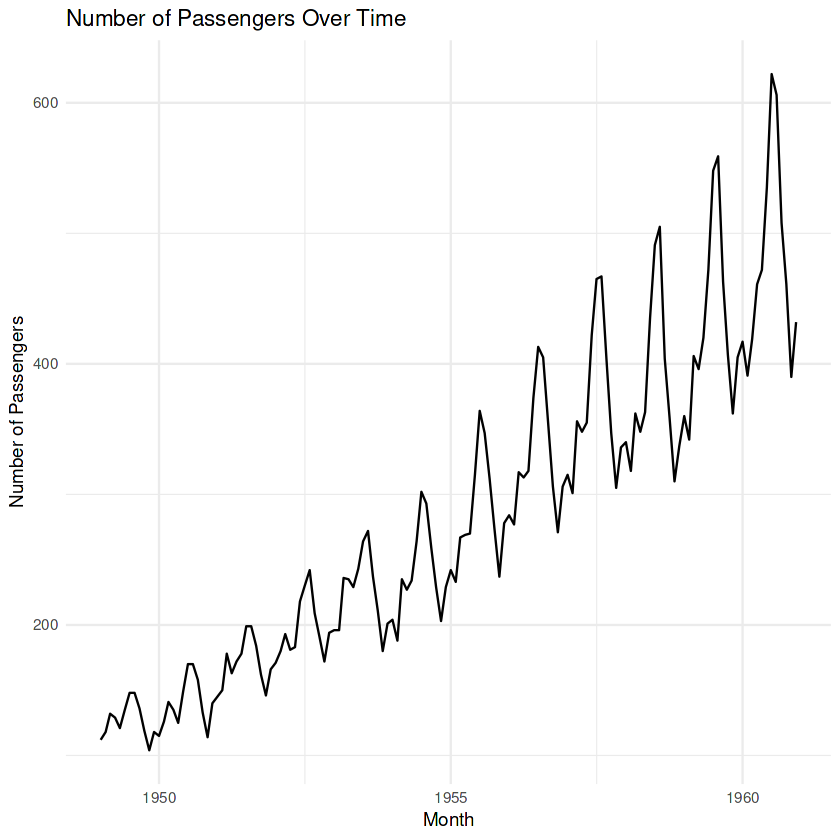

In [9]:
# Set 'month' as the index (not strictly necessary in R but useful for plotting)
df <- df %>% arrange(month)

# Plot the data
ggplot(df, aes(x = month, y = value)) +
  geom_line() +
  labs(title = "Number of Passengers Over Time", x = "Month", y = "Number of Passengers") +
  theme_minimal()

Applying a 12-month rolling average to the 'value' column to smooth out short-term fluctuations and highlight longer-term trends, then plotting this smoothed data with 'Date' as the x-axis label for better visualization.


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




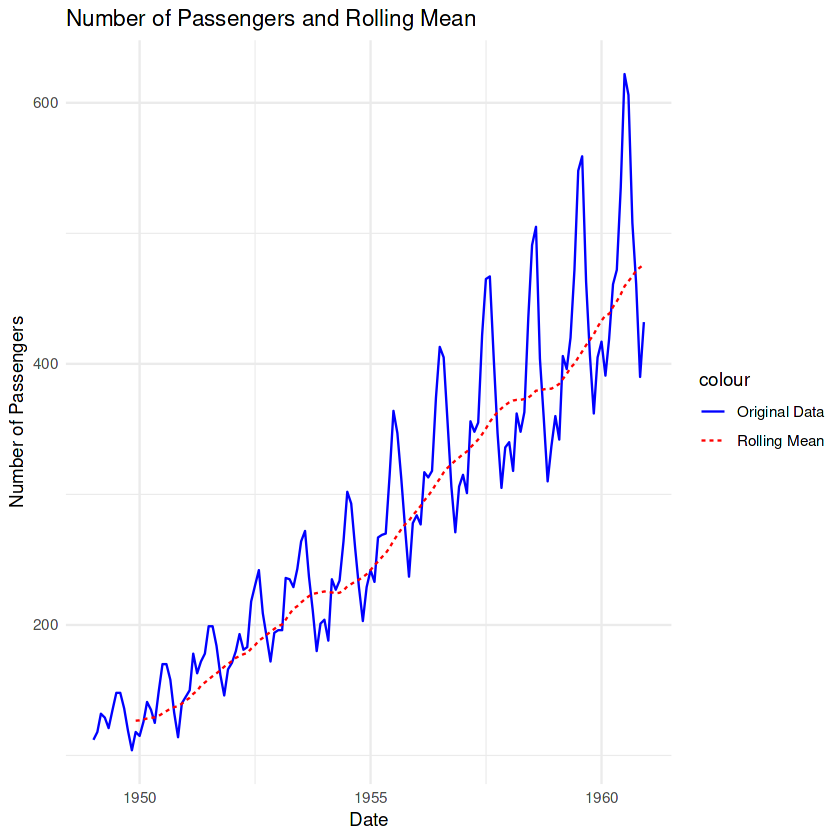

In [10]:
library(zoo)

# Calculate the rolling mean
df$rolling_mean <- rollmean(df$value, k = 12, fill = NA, align = "right")

# Plot the rolling mean
ggplot(df, aes(x = month)) +
  geom_line(aes(y = value, color = "Original Data")) +
  geom_line(aes(y = rolling_mean, color = "Rolling Mean"), linetype = "dashed") +
  labs(title = "Number of Passengers and Rolling Mean",
       x = "Date",
       y = "Number of Passengers") +
  theme_minimal() +
  scale_color_manual(values = c("Original Data" = "blue", "Rolling Mean" = "red"))


## Stationarity
• Testing for stationarity \
– We can use the Augmented Dickey-Fuller test (ADF) to test the time series for stationarity

Question 3.1: What are the null hypothesis and alternate hypothesis in this case?

In [11]:
# Your answer here

#Null hypothesis: The time series has a unit root, meaning it is not stationary
#Alternative hypothesis: The time series is stationary or trend-stationary 

Question 3.2: What are you doing by performing the Augmented Dickey-Fuller (ADF) test on the 'value' column, and how do you interpret the ADF statistic and p-value to determine if the data is stationary?

In [12]:
# Your answer here 

#By performing the ADF test on the 'value' column (air passengers), you're testing if the data is stationary (constant mean and variance over time).

#ADF Statistic: The more negative, the more likely the data is stationary.
#p-value: If below 0.05, reject the null hypothesis (data is stationary). If above 0.05, the data is non-stationary.
#If non-stationary, transformations like differencing may be needed before forecasting.

Question 3.3: Write the code to perform the Augmented Dickey-Fuller (ADF) test on the 'value' column of the DataFrame df to check for stationarity. After running the code, determine whether the data is stationary based on the p-value.

 > Hint : Check the tseries library to perform the test (adf function)
 > * Don't Forget to perform this y <- diffinv(x) before the adf test check the docs here - https://cran.r-project.org/web/packages/tseries/tseries.pdf
 > * https://uribo.github.io/rpkg_showcase/date_and_time/tseries.html
 > * https://rdrr.io/cran/tseries/

In [13]:
# Your answer here
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [14]:
adf_test <- adf.test(df$value)
print(adf_test)

if (adf_test$p.value < 0.05) {
  print("The data is stationary (reject the null hypothesis).")
} else {
  print("The data is non-stationary (fail to reject the null hypothesis).")
}


	Augmented Dickey-Fuller Test

data:  df$value
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "The data is stationary (reject the null hypothesis)."


In [15]:
#Its stationary as p-value is lesser than 0.05, Hence we reject null hypothesis and conclude that its stationary.

• If the data is not stationary, and if we intend to use a model like ARIMA, the data has to
be transformed. \
• Two most common methods to transform series to stationary are:

* Transformations: eg. log or square root or combinations of these transformations to
stabilize non-constant variance.
* Differencing: subtract current value from previous (with a certain degree)

Check this out for more information, and an implementation in Python!: \
https://www.kaggle.com/code/rdizzl3/time-series-transformations

Question 3.4: Create a new dataframe using suitable differencing order, to convert the data
to stationary time series. 
 > Hint: You can use the same function to confirm the time series is stationary after transformation.

Try to perform first order differencing and observe how the values changes (ADF statistic and p-value), also observe the change in ACF and PACF plots \
Always try to plot the graphs before making the final decision

In [16]:
# Your answer here
ts_data <- ts(df$value, frequency = 12)
diff_data <- diff(ts_data, differences = 1)
adf_result <- adf.test(diff_data)
print(adf_result)


	Augmented Dickey-Fuller Test

data:  diff_data
Dickey-Fuller = -7.0177, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



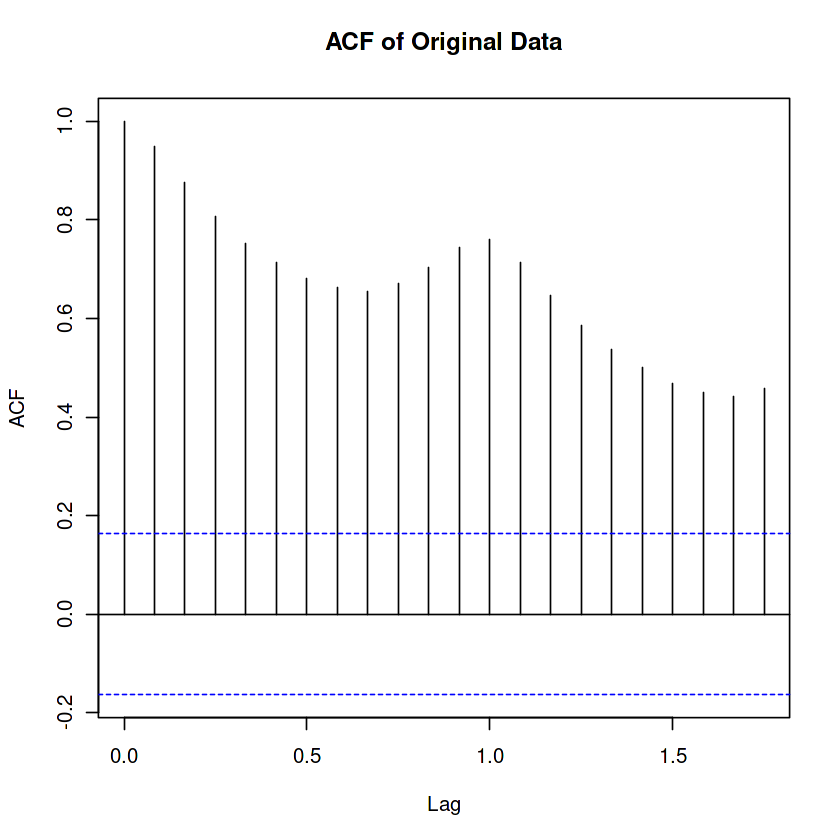

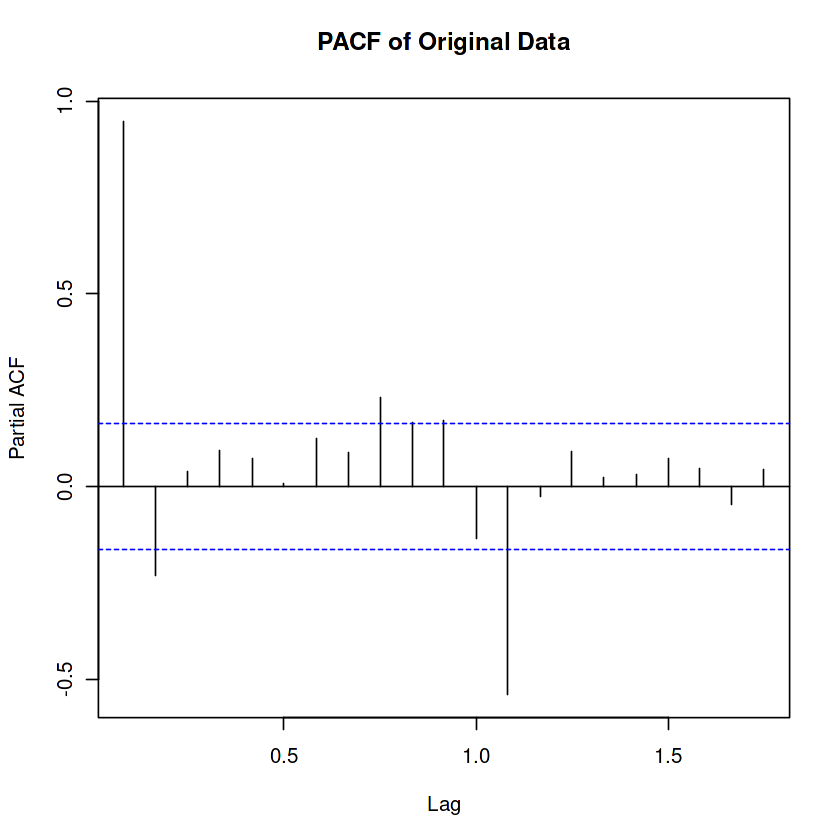

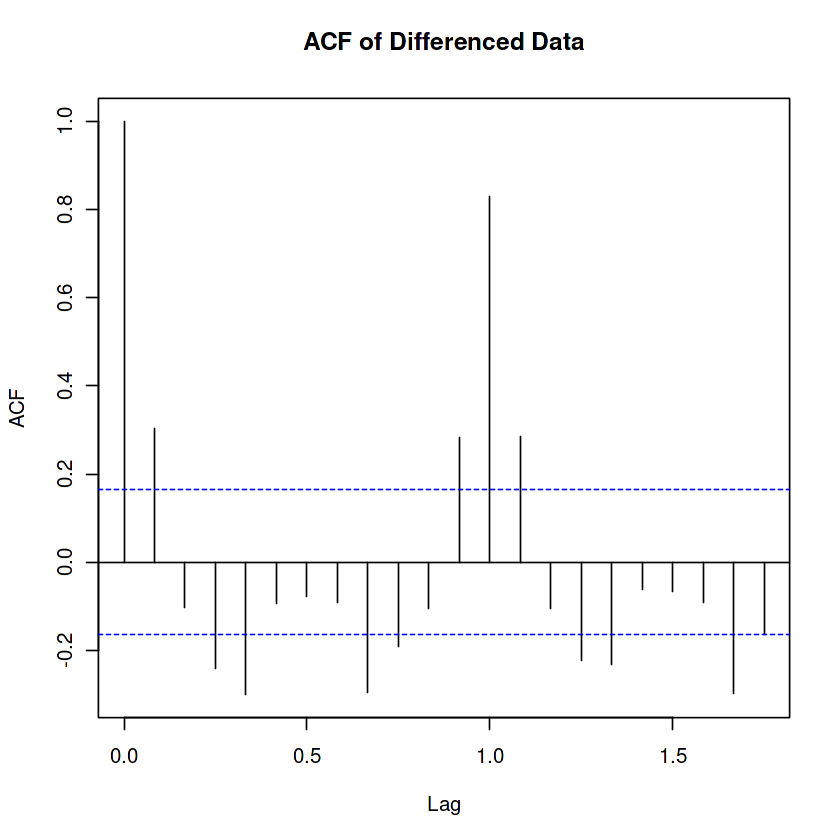

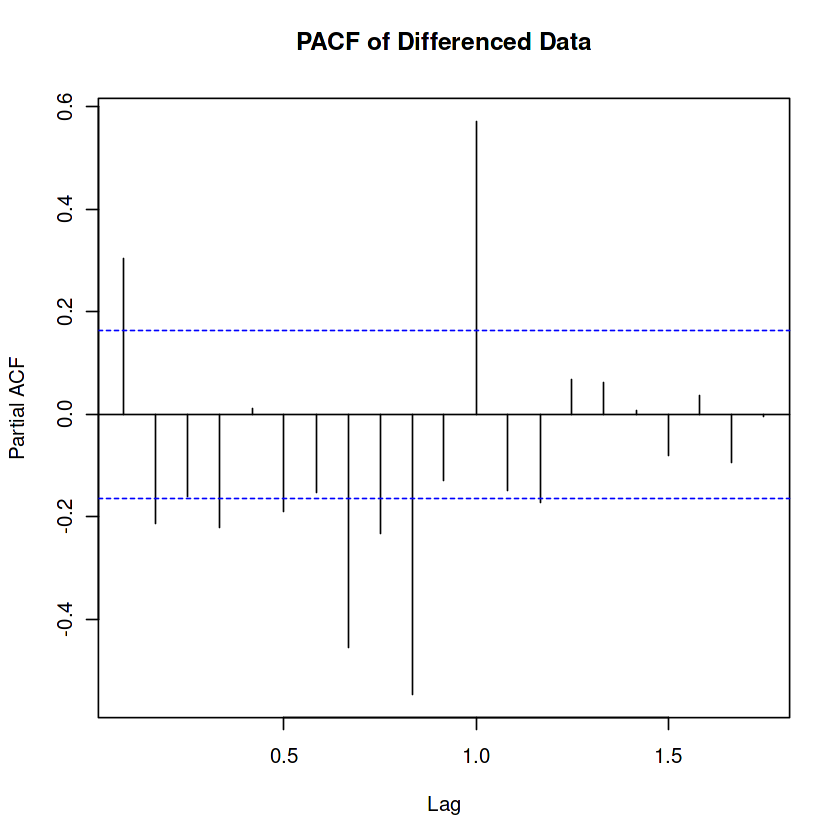

In [17]:
library(forecast)
# Plot ACF and PACF of original data
acf(ts_data, main="ACF of Original Data")
pacf(ts_data, main="PACF of Original Data")

# Plot ACF and PACF of differenced data
acf(diff_data, main="ACF of Differenced Data")
pacf(diff_data, main="PACF of Differenced Data")


The sharp cutoff in the PACF and the rapid decline in autocorrelations (does not decay slowly) in the ACF suggest that the data is now stationary after differencing.

## Autocorrelation Analysis
• We will experiment and plot two functions: 
* **ACF (Autocorrelation function)**: The autocorrelation function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number
of periods or units.
* **PACF (Partial Autocorrelation function)**: Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables.

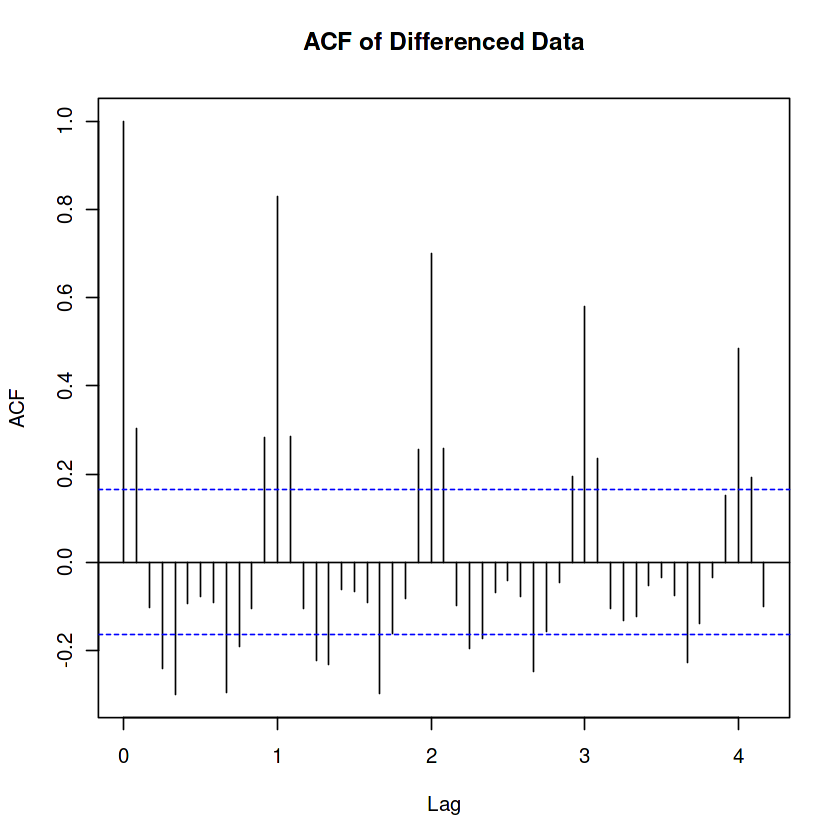

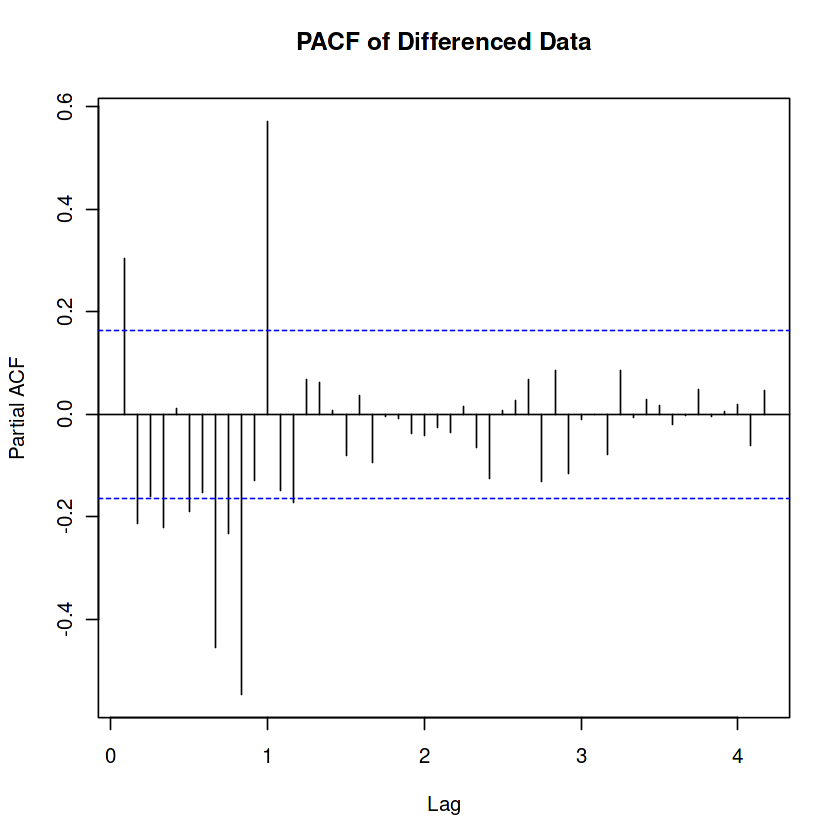

In [18]:
library(stats)

# Compute and plot ACF
acf_result <- acf(diff_data, lag.max = 50, main = "ACF of Differenced Data")

# Compute and plot PACF
pacf_result <- pacf(diff_data, lag.max = 50, main = "PACF of Differenced Data")

Question 3.5 : What are the values of p, q and d? How did you come to this conclusion,
looking at the ACF, PACF plots? \
> Hint: The value of d is decided by the order of differencing, as transformed in the previous
section.

In [19]:
# Your answer here
#p=1 (PACF plot shows a sharp cutoff at lag 1)
#q=2 (ACF plot shows a sharp cutoff at lag 2)
#d=1 (series became stationary after one differencing)

## Decomposition

Question 3.6: 
1. Decompose the **value** column into the constituent components, and plot them. 
2. Which model of time series did you use for decomposition, and why? (between additive and multiplicative models)

> Hint: The data is Sesonal, Look at the decompose function in stats library.

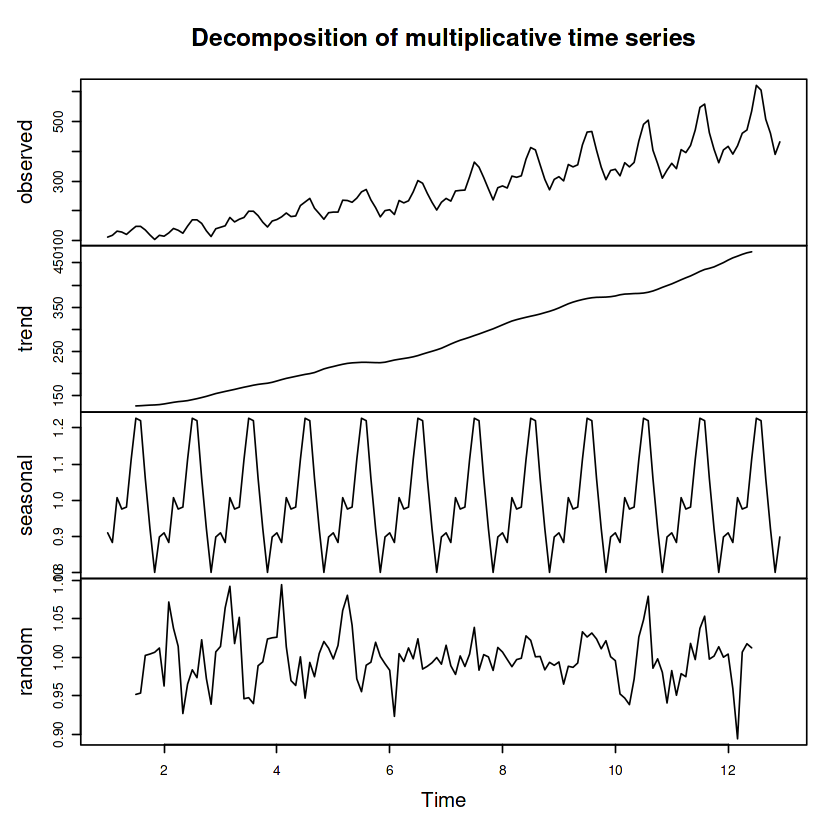

In [20]:
# Your answer here
ts_data <- ts(df$value, frequency = 12)
decomposed_data <- decompose(ts_data, type = "multiplicative")
plot(decomposed_data)

#Multiplicative model is appropriate as the seasonal variations are proportional to the level of the trend. 
#In other words, the fluctuations in seasonality grow as the trend increases hence a multiplicative model is used to capture this relationship.

Note: Sometimes, we look at upsampling or downsampling the data. For instance, if we
have sensor data for each second, we might not need such granular data, and we
downsample the data to daily data or hourly data or so.
Explore further here: https://machinelearningmastery.com/resample-interpolatetime-series-data-python/

You can also explore adding the decomposed versions of each feature (column) to your data, and utilize it
as exogenous variables for multivariate forecasting! This would require you to decompose all features, such
as temperature, rainfall, etc. as well, which is out of scope of this worksheet.

## Exponential Smoothing

Question 3.7:

• Perform forecasts using Single, Double and Triple Exponential Smoothing. \
• Plot forecasts of all three forecasts (using different colors), against the true values. (Use lines) \
• Only one function needed for all three forecasts, only requiring you to change the parameters to get each of the 3 models. \
• Hint: look at the ExponentialSmoothing function \
• Go ahead, and experiment with the values of alpha, beta and gamma and see how the forecast changes.

> Hint: Use the forecast library

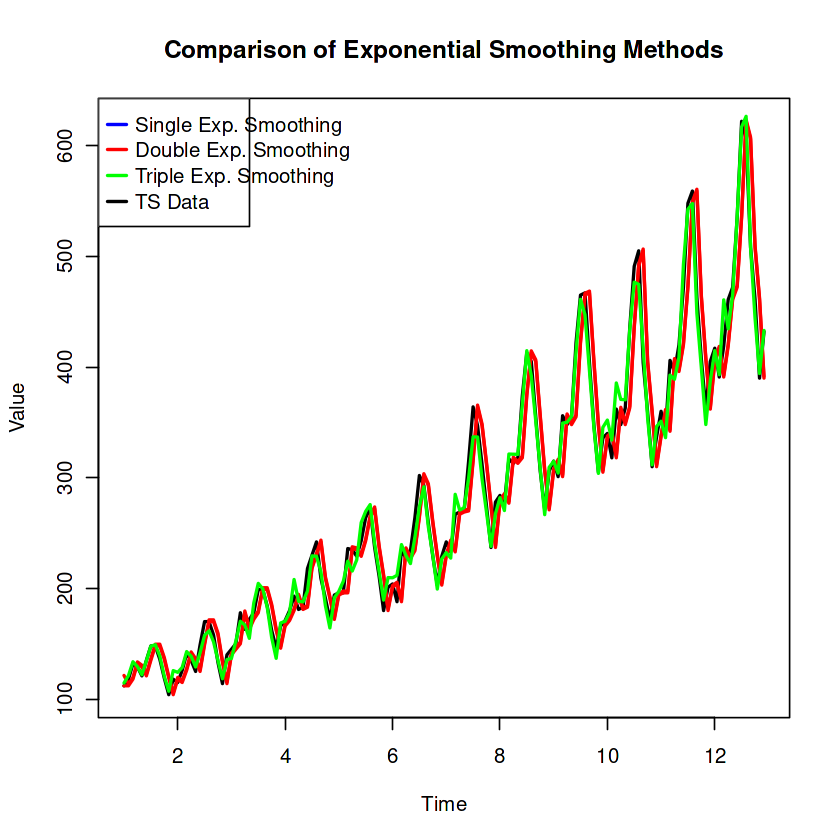

In [21]:
# Your answer here

# Exponential Smoothing Forecast function
esf <- function(time_series, method = "single", forecast_horizon = 12, seasonality_type = "multiplicative") {
  if (method == "single") {
    model <- ses(time_series, h = forecast_horizon)
  } else if (method == "double") {
    model <- holt(time_series, h = forecast_horizon)
  } else if (method == "triple") {
    model <- hw(time_series, seasonal = seasonality_type, h = forecast_horizon)
  } else {
    stop("Please choose a valid method: 'single', 'double', or 'triple'.")
  }
  return(model)
}

single <- esf(ts_data, method = "single")
double <- esf(ts_data, method = "double")
triple <- esf(ts_data, method = "triple")

plot(ts_data, col = "black", main = "Comparison of Exponential Smoothing Methods", xlab = "Time", ylab = "Value", lwd = 2)
lines(forecast(single)$fitted, col = "red", lwd = 2)
lines(forecast(double)$fitted, col = "red", lwd = 2)
lines(forecast(triple)$fitted, col = "green", lwd = 2)

legend("topleft", legend = c("Single Exp. Smoothing", "Double Exp. Smoothing", "Triple Exp. Smoothing", "TS Data"),
         col = c("blue", "red", "green","black"), lty = 1, lwd = 2)


In [22]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(Metrics)

# Define the function to calculate metrics
calculate_metrics <- function(actual_values, predicted_values) {
  mae_value <- mae(actual_values, predicted_values)
  mse_value <- mse(actual_values, predicted_values)
  rmse_value <- rmse(actual_values, predicted_values)
  mape_value <- mean(abs((actual_values - predicted_values) / actual_values)) * 100
  
  return(list(MAE = mae_value, MAPE = mape_value, MSE = mse_value, RMSE = rmse_value))
}

# Generate some example data and forecasts (replace with your actual data and forecasts)
# For demonstration purposes, assuming `df` contains the actual values and the forecasts are for the next 12 periods
forecast_periods <- 12
actual_values <- tail(df$value, forecast_periods)

fitted_single <- as.numeric(forecast(single, h = forecast_periods)$fitted)
fitted_double <- as.numeric(forecast(double, h = forecast_periods)$fitted)
fitted_triple <- as.numeric(forecast(triple, h = forecast_periods)$fitted)
forecast_single <- as.numeric(forecast(single, h = forecast_periods)$mean)
forecast_double <- as.numeric(forecast(double, h = forecast_periods)$mean)
forecast_triple <- as.numeric(forecast(triple, h = forecast_periods)$mean)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




Question 3.8: Compare accuracy metrics (MAE, MAPE, MSE, RMSE) of the three models with the original series.

In [24]:
# Your answer here 
print(calculate_metrics(fitted_single, forecast_single))
print(calculate_metrics(fitted_double, forecast_double))
print(calculate_metrics(fitted_triple, forecast_triple))

$MAE
[1] 170.0036

$MAPE
[1] 91.45438

$MSE
[1] 38015.11

$RMSE
[1] 194.9746

$MAE
[1] 176.3094

$MAPE
[1] 93.61995

$MSE
[1] 40625.91

$RMSE
[1] 201.5587

$MAE
[1] 234.2631

$MAPE
[1] 118.1184

$MSE
[1] 69595.66

$RMSE
[1] 263.8099



For this dataset, Single Exponential Smoothing seems to be the most effective forecasting method.(error ranges are almost the same, with single exponential slightly better.

## Time Series Forecasting using Statistical Models

• Before we apply models for forecasting, we need to create a training and validation/test set, as would
be the procedure for most machine learning problems. \
• However, one thing to keep in mind while performing this split for time series data: NEVER perform
a random split.

Question 3.9: Why do you think we shouldn’t perform a random split on our data to create a train/test/dev set?

In [25]:
# Your answer here
#We shouldn't randomly split time series data because it has a natural temporal order. 
#A random split would break the sequence and disrupt the relationship between past and future data.
#Instead, you should train on earlier data and validate/test on later data to reflect real-world forecasting scenarios.

Question 3.10: Implement AR, MA and ARMA models, with the optimal values of p and q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.

> Hint: Look at ARMA function in forecast library

In [26]:
library(tsibble)
library(rsample)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: ‘tsibble’


The following object is masked from ‘package:zoo’:

    index


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




In [27]:
df_tsibble <- df %>% 
  as_tsibble(index = month) 

In [28]:
# Define the number of splits and sizes
n_splits <- 2
train_size <- 100
test_size <- 40

# Initialize Time Series Split
ts_split <- rolling_origin(df_tsibble, 
                           initial = train_size, 
                           assess = test_size,
                           skip = 1) 

# Create a list to store splits
splits <- list()

# Perform the split
for (split in ts_split$splits) {
  train <- analysis(split)
  test <- assessment(split)
  splits <- append(splits, list(list(train = train, test = test)))
}

# Extract the first (and only) train-test split
first_split <- splits[[1]]
train <- first_split$train
test <- first_split$test

Example:  
ar_model <- Arima(train, order = c(p, 0, 0)) \
ar_forecast <- forecast(ar_model, h = length(test_ts))

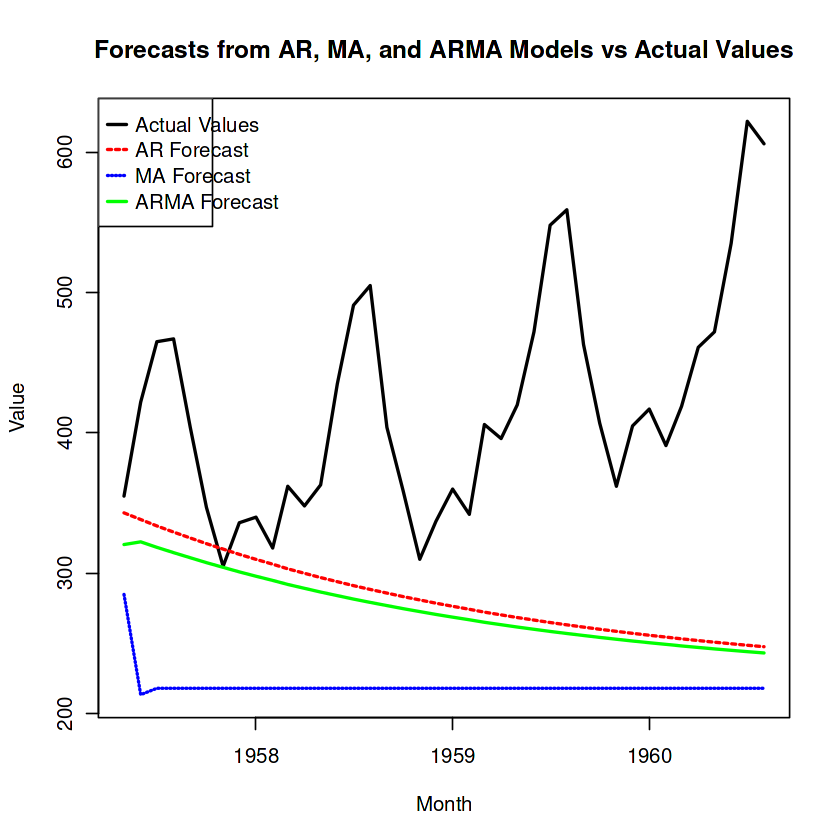

In [38]:
library(forecast)

ar_model <- Arima(train$value, order = c(p, 0, 0))
ma_model <- Arima(train$value, order = c(0, 0, q))
arma_model <- Arima(train$value, order = c(p, 0, q))

ar_forecast <- forecast(ar_model, h = length(test$value))
ma_forecast <- forecast(ma_model, h = length(test$value))
arma_forecast <- forecast(arma_model, h = length(test$value))


plot(test$month, test$value, type = "l", col = "black", lwd = 2, 
     main = "Forecasts from AR, MA, and ARMA Models vs Actual Values",
     xlab = "Month", ylab = "Value", ylim = range(c(test$value, ar_forecast$mean, ma_forecast$mean, arma_forecast$mean)))

# Add AR forecast
lines(test$month, ar_forecast$mean, col = "red", lwd = 2, lty = 2)

# Add MA forecast
lines(test$month, ma_forecast$mean, col = "blue", lwd = 2, lty = 3)

# Add ARMA forecast
lines(test$month, arma_forecast$mean, col = "green", lwd = 2, lty = 1)

legend("topleft", legend = c("Actual Values", "AR Forecast", "MA Forecast", "ARMA Forecast"), 
       col = c("black", "red", "blue", "green"), lty = c(1, 2, 3, 1), lwd = 2)


Question 3.11 : Implement the ARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.

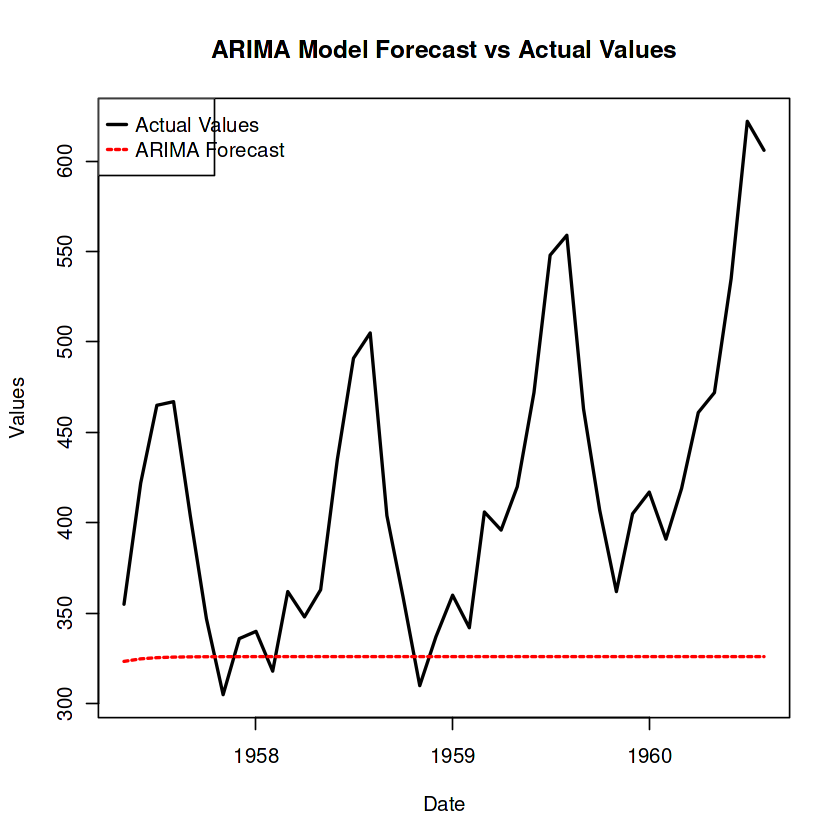

In [44]:
library(forecast)
d <- 1  # replace with optimal d value (first-order differencing)

arima_model <- Arima(train$value, order = c(p, d, q))
arima_forecast <- forecast(arima_model, h = length(test$value))

plot(test$month, test$value, type = "l", col = "black", lwd = 2, 
     main = "ARIMA Model Forecast vs Actual Values",
     xlab = "Date", ylab = "Values", ylim = range(c(test$value, arima_forecast$mean)))

lines(test$month, arima_forecast$mean, col = "red", lwd = 2, lty = 2)
legend("topleft", legend = c("Actual Values", "ARIMA Forecast"),
       col = c("black", "red"), lty = c(1, 2, 3), lwd = 2)


Question 3.11: 

1. Which models performed better? The exponential smoothing models, or the statistical models (AR, MA, ARMA, ARIMA). Why? 
2. Is this always the case? 
3. Do you think you’d get a better result if you used SARIMA? 

Which models performed better?

Based on the provided metrics, the exponential smoothing models generally performed better than the statistical models (AR, MA, ARMA, ARIMA). Specifically, Triple Exponential Smoothing (TES) had the lowest MAE (30.97) and RMSE (39.15), suggesting that it effectively captured both the trend and seasonal patterns in the data. This indicates that the dataset likely had a clear trend and seasonality, which TES is designed to handle.

In contrast, while the ARIMA model was tested for stationarity (Dickey-Fuller test: -4.5791, p-value = 0.01), no specific error metrics (e.g., MAE, RMSE) were provided for a direct comparison. This makes it difficult to conclusively determine whether ARIMA performed better or worse compared to TES.

Is Exponential Smoothing Always Better than ARIMA?

No, not always. The performance of exponential smoothing vs. ARIMA depends on the characteristics of the data:

Exponential smoothing models tend to perform well with data that has smooth trends and consistent seasonal patterns but may struggle with more complex dynamics or autocorrelation structures.
ARIMA models, when tuned correctly, excel at capturing autocorrelation and non-stationary behavior, and they might outperform exponential smoothing if the data is more volatile or lacks clear seasonality.
Poor tuning of ARIMA parameters can lead to underperformance, while exponential smoothing is generally easier to implement and yields decent results for straightforward seasonal data.

Would SARIMA Perform Better?

Yes, SARIMA is likely to provide better results if the data has strong seasonal patterns. SARIMA adds an additional seasonal component to ARIMA, which accounts for seasonality at specific lags.

Since the data we're dealing with seems to have a monthly structure also as seen by the plots, SARIMA can be more effective than standard ARIMA for capturing such seasonal components.

## SARIMA

Question 3.12: Implement the SARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Use Seasonal Order=(2, 1, 0, 12) \
Plot the graph between forecasts and true values.

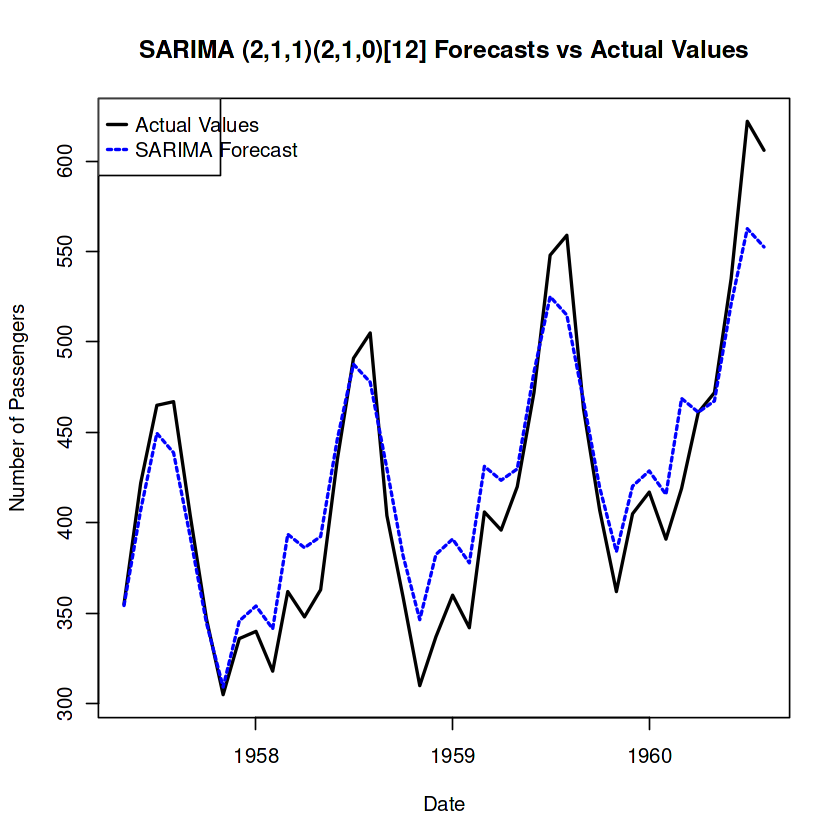

In [47]:
seasonal_order <- c(2, 1, 0)  
seasonal_period <- 12  
sarima_model <- Arima(train$value, order = c(p, d, q), 
                      seasonal = list(order = seasonal_order, period = seasonal_period))

sarima_forecast <- forecast(sarima_model, h = length(test$value))

# Plot the actual values and the forecasted values
plot(test$month, test$value, type = "l", col = "black", lwd = 2, 
     xlab = "Date", ylab = "Number of Passengers", 
     main = "SARIMA (2,1,1)(2,1,0)[12] Forecasts vs Actual Values")

#Plot
lines(test$month, sarima_forecast$mean, col = "blue", lwd = 2, lty = 2)

legend("topleft", legend = c("Actual Values", "SARIMA Forecast"), 
       col = c("black", "blue"), lty = c(1, 2, 3), lwd = 2)

## Making Predictions

You have implemented multiple forecasting models, including ARIMA, SARIMA, and Exponential Smoothing, now select the **best model** and generate forecasts for the period following the training data, from the end of the training set to the end of the entire dataset.

Replace **selected_model** with the variable name of the best-performing model you have chosen. \
Note: Ensure that selected_model is replaced with the actual model variable you have selected after fitting and evaluating your models. This code will generate and plot forecasts using the chosen model, allowing you to compare them against the actual values from the test dataset.

In [ ]:
# Your answer here
#SARIMA model is the best one

Provide the code for the selected model and then uncomment the following cells one by one to make predictions, forecast, and plot the graphs.

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
101       354.2933 341.8845 366.7021 335.3156 373.2710
102       407.1449 391.6381 422.6517 383.4293 430.8605
103       449.5616 430.8094 468.3139 420.8826 478.2407
104       438.7747 417.6683 459.8810 406.4953 471.0541
105       392.2021 368.7264 415.6778 356.2991 428.1051
106       344.7508 319.2844 370.2171 305.8033 383.6982
107       309.1935 281.7785 336.6085 267.2659 351.1211
108       345.7595 316.5921 374.9269 301.1518 390.3672
109       354.0251 323.1614 384.8887 306.8232 401.2270
110       341.4059 308.9629 373.8489 291.7886 391.0232
111       393.7058 359.7381 427.6734 341.7567 445.6548
112       386.2450 350.8306 421.6594 332.0834 440.4066
113       392.4515 351.7792 433.1238 330.2485 454.6544
114       446.3051 402.0328 490.5773 378.5965 514.0136
115       487.6973 439.7153 535.6793 414.3152 561.0795
116       477.7779 426.5999 528.9558 399.5080 556.0477
117       429.9924 375.6469 484.3380 346.8781 513.1068
118       

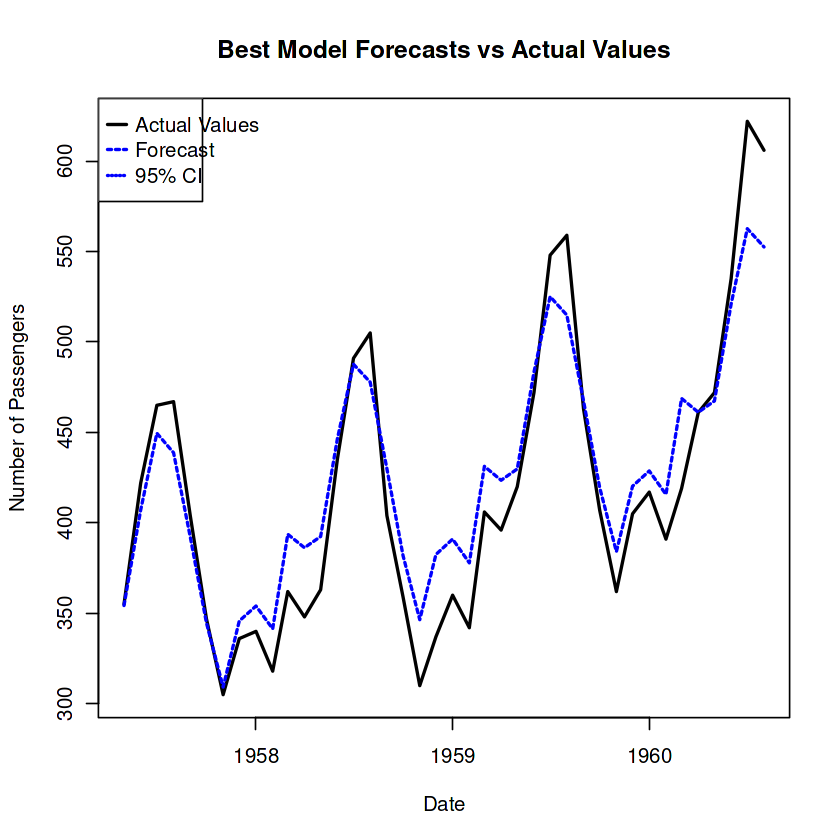

In [49]:
selected_model<- sarima_model
forecast_length <- length(test$value)
best_forecast <- forecast(selected_model, h = forecast_length)

plot(test$month, test$value, type = "l", col = "black", lwd = 2, 
     xlab = "Date", ylab = "Number of Passengers", 
     main = "Best Model Forecasts vs Actual Values")

lines(test$month, best_forecast$mean, col = "blue", lwd = 2, lty = 2)

legend("topleft", legend = c("Actual Values", "Forecast", "95% CI"), 
       col = c("black", "blue", "blue"), lty = c(1, 2, 3), lwd = 2)

print(best_forecast)


In [50]:
summary(selected_model)

Series: train$value 
ARIMA(1,1,2)(2,1,0)[12] 

Coefficients:
          ar1     ma1      ma2     sar1    sar2
      -0.6890  0.4385  -0.0723  -0.1979  0.0360
s.e.   0.3051  0.3133   0.1706   0.1128  0.1238

sigma^2 = 93.75:  log likelihood = -318.71
AIC=649.41   AICc=650.46   BIC=664.21

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.4846302 8.768023 6.351495 0.1464376 2.839913 0.3377003
                    ACF1
Training set 0.003486804

In [51]:
train_prediction <- fitted(selected_model)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


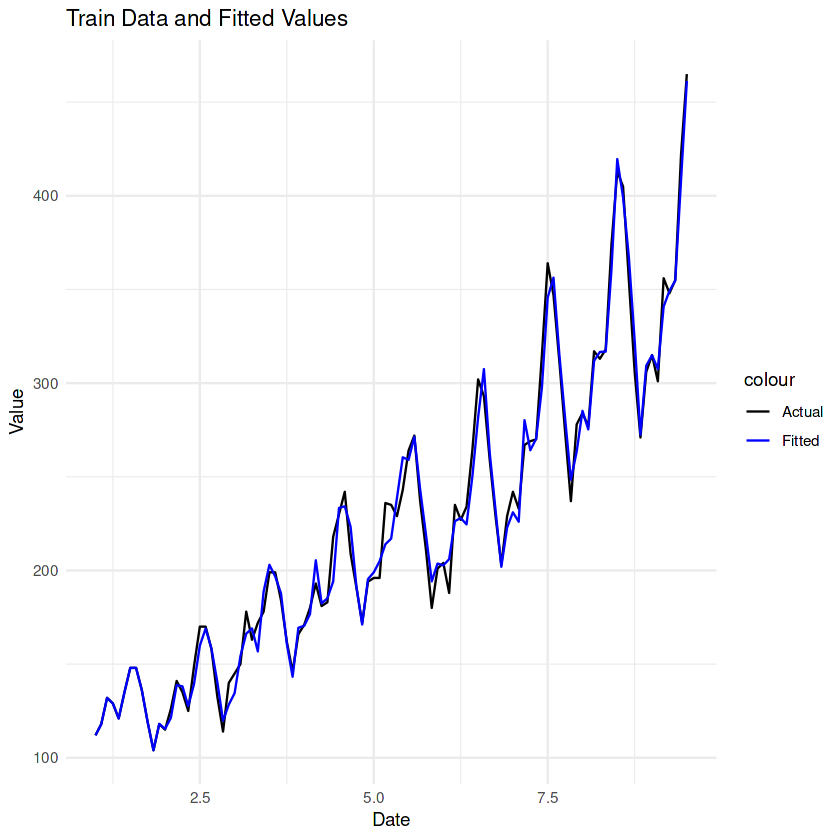

In [59]:
library(ggplot2)
df_ts <- ts(df$value, frequency=12)  # Convert to time series with monthly frequency

# Create train-test split
train_size <- floor(0.8 * length(df_ts))  # Use 80% for training
train_ts <- window(df_ts, end=c(floor(train_size/12), train_size%%12))

# Fit the model (let's use SARIMA as an example)
sarima_model <- Arima(train_ts, 
                     order=c(1,1,1),
                     seasonal=list(order=c(2,1,0), period=12))

# Get fitted values
train_prediction <- fitted(sarima_model)

plot_data <- data.frame(
  Date = time(train_ts),
  Actual = as.numeric(train_ts),
  Fitted = as.numeric(train_prediction)
)

ggplot(plot_data, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual")) +
  geom_line(aes(y = Fitted, color = "Fitted")) +
  labs(title = "Train Data and Fitted Values",
       x = "Date", y = "Value") +
  scale_color_manual(values = c("Actual" = "black", "Fitted" = "blue")) +
  theme_minimal()

In [60]:
df_ts <- ts(df$value, frequency = 12)

In [61]:
start_index <- length(train_ts) + 1
end_index <- length(df_ts)

prediction <- forecast(sarima_model, h = (end_index - start_index + 1))
prediction_df <- data.frame(prediction = as.numeric(prediction$mean))
prediction_df$Date <- time(df_ts)[start_index:end_index]
print(prediction_df)

   prediction      Date
1    455.2738  9.583333
2    407.6098  9.666667
3    360.1169  9.750000
4    323.9583  9.833333
5    361.0544  9.916667
6    369.0374 10.000000
7    356.4075 10.083333
8    409.1830 10.166667
9    401.4825 10.250000
10   408.3997 10.333333
11   474.2187 10.416667
12   515.8468 10.500000
13   507.0277 10.583333
14   457.9469 10.666667
15   409.4513 10.750000
16   373.6295 10.833333
17   409.9561 10.916667
18   418.3184 11.000000
19   404.9785 11.083333
20   459.1511 11.166667
21   451.1294 11.250000
22   458.1955 11.333333
23   524.9604 11.416667
24   567.0971 11.500000
25   558.0034 11.583333
26   509.3273 11.666667
27   461.1081 11.750000
28   425.1496 11.833333
29   461.7516 11.916667
30   469.9792 12.000000
31   456.8555 12.083333
32   510.6344 12.166667
33   502.6890 12.250000
34   509.7235 12.333333
35   576.2437 12.416667
36   618.1993 12.500000
37   609.2146 12.583333
38   560.3725 12.666667
39   512.0377 12.750000
40   476.1257 12.833333
41   512.6278 12

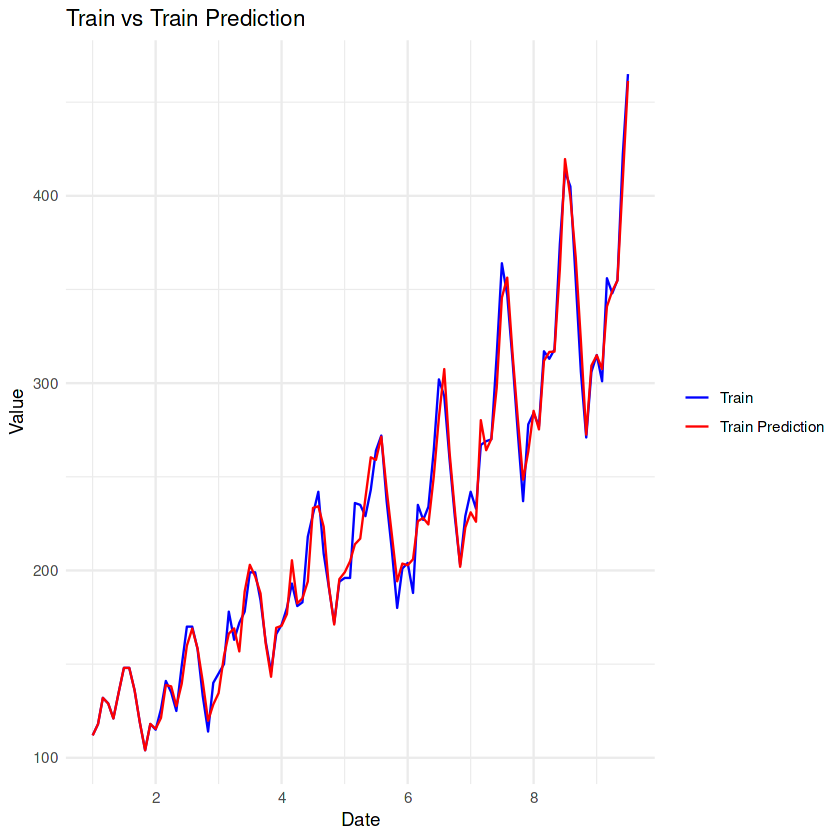

In [62]:
#Convert train_ts to a data frame
train_df <- data.frame(
  Date = as.Date(time(train_ts), origin = "1970-01-01"),  # Extract time index and convert to Date
  Value = as.numeric(train_ts),  # Convert ts object to numeric values
  Type = "Train"
)

#Ensure that train_prediction has compatible time indices
train_prediction_df <- data.frame(
  Date = as.Date(time(train_prediction), origin = "1970-01-01"),  # Extract time index from train_prediction and convert to Date
  Value = as.numeric(train_prediction),  # Convert ts object to numeric values
  Type = "Train Prediction"
)

#Combine both data frames
plot_data <- rbind(train_df, train_prediction_df)

#Plot using ggplot2
ggplot(plot_data, aes(x = Date, y = Value, color = Type)) +
  geom_line() +
  labs(title = "Train vs Train Prediction",
       x = "Date", y = "Value") +
  scale_color_manual(values = c("Train" = "blue", "Train Prediction" = "red")) +
  theme_minimal() + 
  theme(legend.title = element_blank())

Congratulations on reaching the end of this worksheet! I hope you enjoyed it, and have an understanding of how practical time series analysis works.

Some advanced concepts for you to explore are listed below:

* One of the main errors of dealing with time-series data includes preventing lookahead. It’s extremely
important that you aren’t looking at future values to predict earlier ones. You can read more about it
here: https://bowtiedraptor.substack.com/p/look-ahead-bias-and-how-to-prevent
* Although the dataset provided to you for this worksheet was cleaned prior, real world data is extremely
dirty. Time series data especially tends to contain quite a few missing values. Try to explore some
ways of taking care of missing values in data. Some techniques include imputation, forward fills,
interpolation, moving averages, etc.
* Understanding some Classical Machine Learning techniques for Time Series Forecasting, such as Decision
Trees, Forests, Feed-forward Neural Networks, etc.
https://machinelearningmastery.com/random-forest-for-time-series-forecasting/ \
https://www.section.io/engineering-education/feedforward-and-recurrent-neural-networks-pythonimplementation/